In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd

In [53]:
def get_data(ticker='^GSPC', start_='2010-01-01', end_='2022-12-31', interval_='1d',fill_weekends=False):
    # download data
    df = yf.download(ticker, start_, end_, interval=interval_)
    # rename columns
    df.rename(columns={"Open": "open", "Adj Close": "close", "High": "high", "Low": "low", "Volume": "volume"}, inplace=True)
    # drop close column
    df.drop("Close", inplace=True, axis=1)
    # fill weekends
    if fill_weekends:
        df = df.resample('D').ffill()
    return df

In [54]:
df_orig = get_data()

[*********************100%***********************]  1 of 1 completed


In [55]:
df = pd.read_json('data.json')

In [56]:
# if cash in step i-1 is higher than cash in step i, then it is a buy
df['buy'] = df['cash'].shift(1) > df['cash']
# if cash in step i-1 is lower than cash in step i, then it is a sell
df['sell'] = df['cash'].shift(1) < df['cash']

In [57]:
df

,sp500,cash,buy,sell
0,0.00000,1.000000,False,False
1,0.00000,1.000000,False,False
2,0.27036,0.730095,True,False
3,0.00000,1.000455,False,True
4,0.00000,1.000455,False,False
...,...,...,...,...
3195,0.00000,11.458256,False,False
3196,0.00000,11.458256,False,False
3197,0.00000,11.458256,False,False
3198,0.00000,11.458256,False,False


In [58]:
df_orig.reset_index(inplace=True)
df_orig = df_orig.iloc[:len(df)]

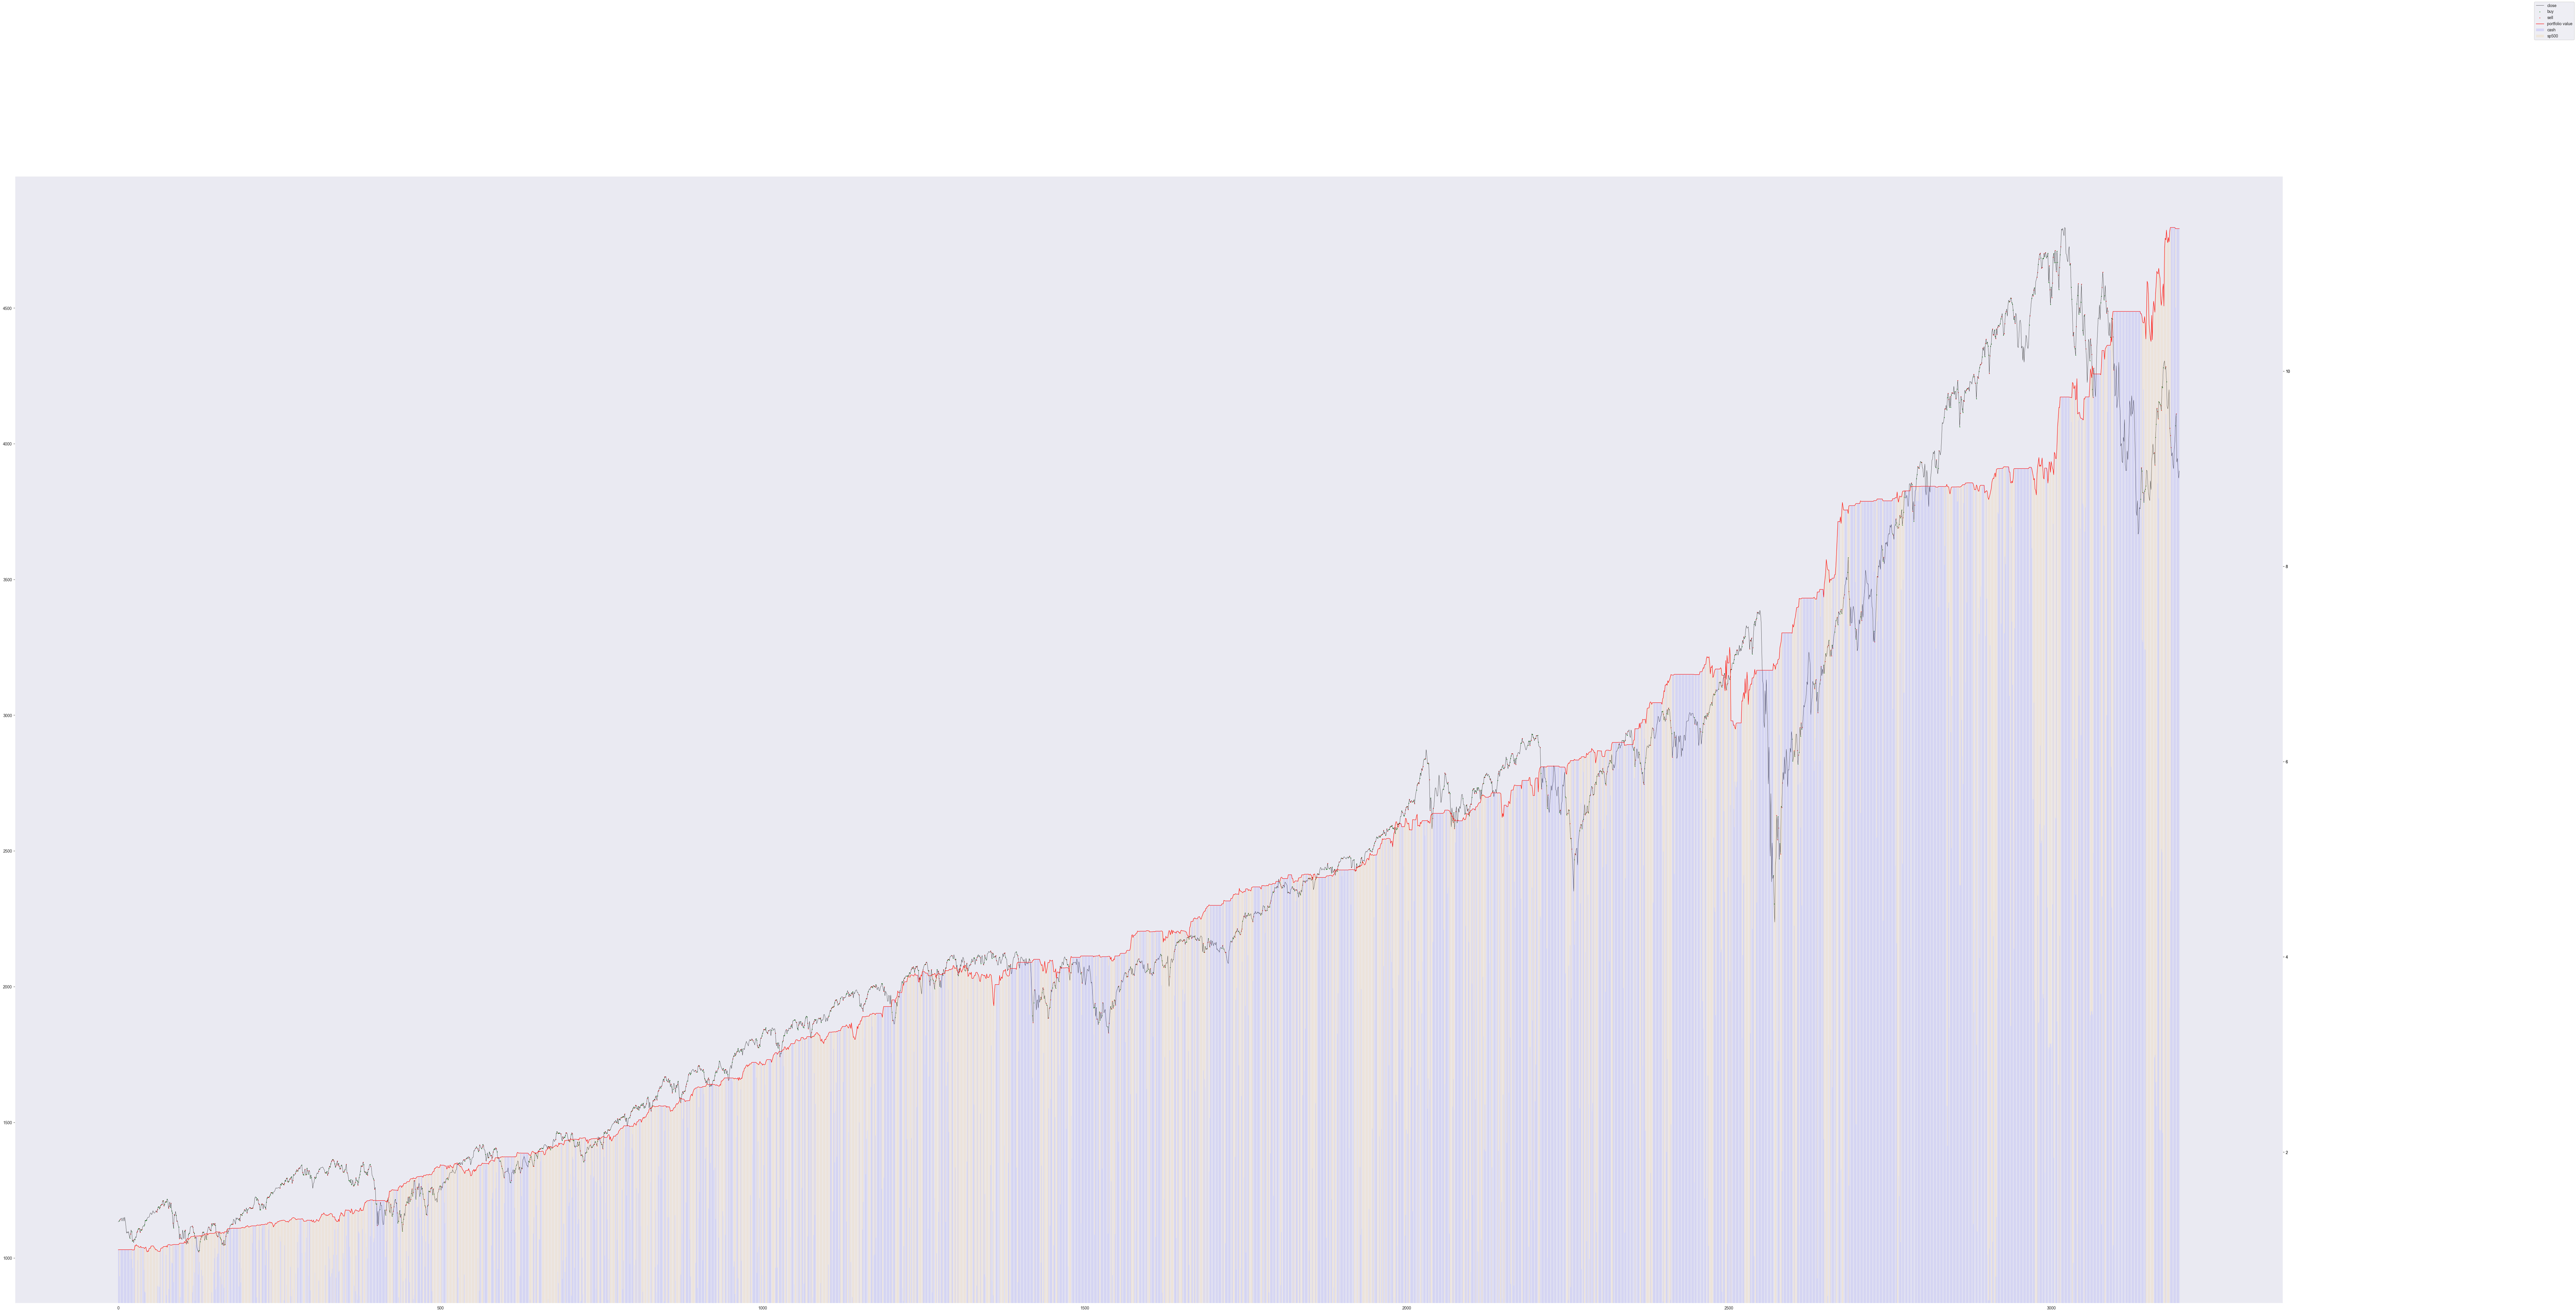

In [59]:
# plot close price and buy/sell signals
fig, ax1 = plt.subplots(figsize=(100, 50))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax1.plot(df_orig['close'], label='close', linewidth=0.5, color='black')

ax1.scatter(df[df['buy']].index, df_orig['close'][df['buy']], marker='^', color='green', label='buy', s=1)
ax1.scatter(df[df['sell']].index, df_orig['close'][df['sell']], marker='v', color='red', label='sell', s=1)

ax2.plot(df['cash'] + df['sp500'], label='portfolio value', linewidth=1, color='red')

ax3.bar(df.index, height=df['cash'], label='cash', linewidth=0.5, color='blue', bottom=0, alpha=0.1)
ax3.bar(df.index, height=df['sp500'], label='sp500', linewidth=0.5, color='orange', bottom=df['cash'], alpha=0.1)

ax3.set_ylim(ax2.get_ylim())


ax1.grid(False)
ax2.grid()
ax3.grid(False)
fig.legend()
plt.show()
